<a href="https://colab.research.google.com/github/Mohammed-Saif-07/ML-winter-quarter/blob/main/activity_8ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


Load MNIST Dataset

In [2]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(int)

# Split: 30,000 train / 5,000 test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, train_size=30000, stratify=y, random_state=42
)

X_test, _, y_test, _ = train_test_split(
    X_temp, y_temp, test_size=5000, stratify=y_temp, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (30000, 784)
Testing set shape: (35000, 784)


Feature Scaling

In [3]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Individual Models

In [4]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
sgd = SGDClassifier(random_state=42)
nb = GaussianNB()

rf.fit(X_train, y_train)                # Tree-based (no scaling required)
knn.fit(X_train_scaled, y_train)        # Distance-based
sgd.fit(X_train_scaled, y_train)        # Gradient-based
nb.fit(X_train, y_train)                # Probabilistic


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GaussianNB()

Evaluate Individual Models

In [5]:
models = {
    "Random Forest": (rf, X_test),
    "KNN": (knn, X_test_scaled),
    "SGD": (sgd, X_test_scaled),
    "Naive Bayes": (nb, X_test),
}

results = {}

print("Individual Model Performance\n")

for name, (model, X_eval) in models.items():
    preds = model.predict(X_eval)
    acc = accuracy_score(y_test, preds)
    results[name] = acc

    print(f"{name} Accuracy: {acc:.4f}")


Individual Model Performance

Random Forest Accuracy: 0.9628
KNN Accuracy: 0.9342
SGD Accuracy: 0.9057
Naive Bayes Accuracy: 0.5537


Hard Voting Ensemble

In [6]:
voting_hard = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=5)),
        ("sgd", SGDClassifier(random_state=42)),
        ("nb", GaussianNB()),
    ],
    voting="hard",
)

voting_hard.fit(X_train_scaled, y_train)

hard_preds = voting_hard.predict(X_test_scaled)
hard_acc = accuracy_score(y_test, hard_preds)

results["Hard Voting Ensemble"] = hard_acc

print("\nHard Voting Accuracy:", hard_acc)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



Hard Voting Accuracy: 0.9500571428571428


Soft Voting Ensemble

In [7]:
voting_soft = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=100, random_state=42)),
        ("knn", KNeighborsClassifier(n_neighbors=5)),
        ("nb", GaussianNB()),
    ],
    voting="soft",
)

voting_soft.fit(X_train_scaled, y_train)

soft_preds = voting_soft.predict(X_test_scaled)
soft_acc = accuracy_score(y_test, soft_preds)

results["Soft Voting Ensemble"] = soft_acc

print("Soft Voting Accuracy:", soft_acc)


Soft Voting Accuracy: 0.9144


Compare All Results

In [8]:
print("\nFinal Accuracy Comparison\n")

for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

# Convert to DataFrame for clean display
results_df = pd.DataFrame.from_dict(results, orient="index", columns=["Accuracy"])
results_df.sort_values(by="Accuracy", ascending=False)



Final Accuracy Comparison

Random Forest: 0.9628
KNN: 0.9342
SGD: 0.9057
Naive Bayes: 0.5537
Hard Voting Ensemble: 0.9501
Soft Voting Ensemble: 0.9144


,Accuracy
Random Forest,0.962800
Hard Voting Ensemble,0.950057
KNN,0.934229
Soft Voting Ensemble,0.914400
SGD,0.905743
Naive Bayes,0.553657


Classification Report (Best Ensemble)

In [9]:
print("\nClassification Report — Hard Voting Ensemble\n")
print(classification_report(y_test, hard_preds))



Classification Report — Hard Voting Ensemble

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3452
           1       0.95      0.99      0.97      3938
           2       0.95      0.95      0.95      3495
           3       0.94      0.94      0.94      3571
           4       0.96      0.95      0.96      3413
           5       0.96      0.92      0.94      3156
           6       0.97      0.97      0.97      3438
           7       0.96      0.95      0.95      3646
           8       0.93      0.92      0.92      3412
           9       0.93      0.93      0.93      3479

    accuracy                           0.95     35000
   macro avg       0.95      0.95      0.95     35000
weighted avg       0.95      0.95      0.95     35000



Confusion Matrix (Hard Voting)

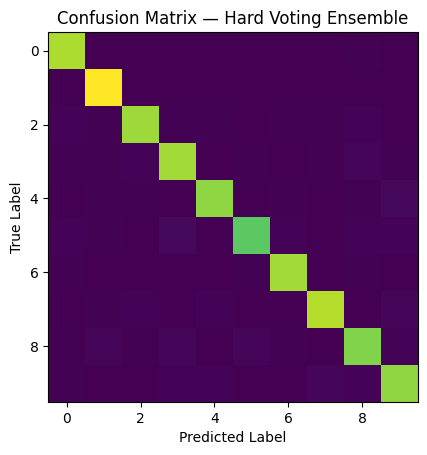

In [10]:
cm = confusion_matrix(y_test, hard_preds)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix — Hard Voting Ensemble")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


**Reflection & Summary**

In this activity, I learned that ensemble learning improves model performance by combining predictions from multiple classifiers instead of relying on a single model. By aggregating different algorithms, ensembles can reduce errors and increase stability.

Ensembles are most beneficial when individual models make different types of mistakes. When models are diverse (such as tree-based, distance-based, and probabilistic), voting methods can balance their strengths and weaknesses.

From my results, I observed that strong individual models like Random Forest and KNN already performed very well, so the ensemble improvement was modest. This shows that ensembles are most powerful when no single model clearly dominates performance.